In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import neurobiases
import numpy as np
import os

from sklearn.utils.extmath import cartesian

%matplotlib inline

In [2]:
results_path_a = os.path.join(os.environ['HOME'], 'fits/neurobiases/exp6a.npz')
results_path_b = os.path.join(os.environ['HOME'], 'fits/neurobiases/exp6b.npz')

In [3]:
results_em = np.load(results_path_a)
results_tc = np.load(results_path_b)

In [4]:
a_true = results_em['a_true'][:]
b_true = results_em['b_true'][:]
B_true = results_em['B_true'][:].reshape((10, 10))
Psi_true = results_em['Psi_true'][:]

a_est_em = results_em['a_est'][:]
a_est_tc = results_tc['a_est'][:]
b_est_em = results_em['b_est'][:]
b_est_tc = results_tc['b_est'][:]
B_est = results_em['B_est'][:]
Psi_est = results_em['Psi_est'][:]
scores_em = results_em['scores'][:].reshape((30, 30, -1))
scores_tc = results_tc['scores'][:].reshape((30, 30, -1))
bics_em = results_em['bics'][:].reshape((30, 30, -1))
bics_tc = results_tc['bics'][:].reshape((30, 30, -1))

In [5]:
N = a_true.size
M = b_true.size

In [6]:
ticks_em = [0, 6, 12, 18, 24, 29]
xticklabels_em = ['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1']
yticklabels_em = ['1e-4', '1e-3', '1e-2', '1e-1', '1e-0', '1e1']

In [7]:
ticks_tc = [0, 10, 19, 29]
xticklabels_tc = ['10', '1e2', '1e3', '1e4']
yticklabels_tc = ['10', '1e2', '1e3', '1e4']

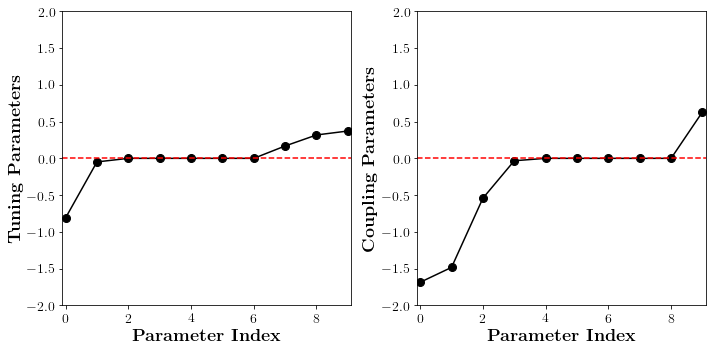

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(np.sort(a_true), color='black', marker='o', markersize=8)
axes[1].plot(np.sort(b_true), color='black', marker='o', markersize=8)

for ax in axes:
    ax.set_ylim([-2, 2])
    ax.set_xlim([-0.1, 9.1])
    ax.axhline(0, color='r', linestyle='--')
    ax.tick_params(labelsize=14)
    ax.set_xlabel(r'\textbf{Parameter Index}', fontsize=18)
    
axes[0].set_ylabel(r'\textbf{Tuning Parameters}', fontsize=18)
axes[1].set_ylabel(r'\textbf{Coupling Parameters}', fontsize=18)
plt.tight_layout()

# Cross-validated Log-likelihood

In [8]:
mean_lls_em = np.mean(scores_em, axis=2)
mean_lls_tc = np.mean(scores_tc, axis=2)
best_ll_em = np.unravel_index(np.argmax(mean_lls_em), mean_lls_em.shape)
best_ll_tc = np.unravel_index(np.argmax(mean_lls_tc), mean_lls_tc.shape)

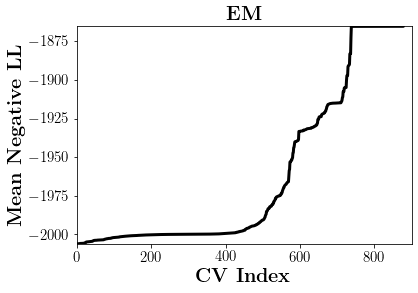

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.sort(-mean_lls_em.ravel()), linewidth=3, color='black')
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean Negative LL}', fontsize=20)

ax.set_xlim([0, 900])
ax.set_ylim([-np.max(mean_lls_em), -np.percentile(mean_lls_em, q=10)])
ax.tick_params(labelsize=15)
ax.set_title(r'\textbf{EM}', fontsize=20)
plt.show()

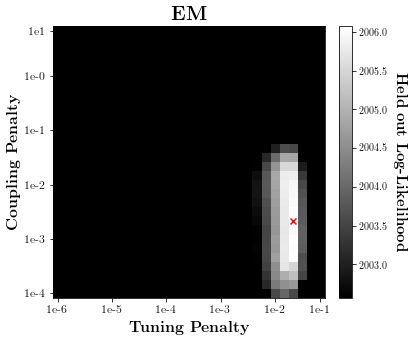

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_lls_em, vmin=np.percentile(mean_lls_em, q=90), vmax=np.max(mean_lls_em))
ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks(ticks_em)
ax.set_yticks(ticks_em)
ax.set_xticklabels(xticklabels_em, fontsize=12)
ax.set_yticklabels(yticklabels_em, fontsize=12)

ax.scatter(best_ll_em[1], best_ll_em[0], color='red', marker='x')

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Held out Log-Likelihood}', fontsize=15, labelpad=20, rotation=270)

ax.set_title(r'\textbf{EM}', fontsize=20)
plt.show()

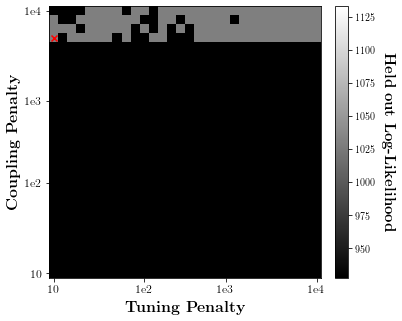

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_lls_tc, vmin=np.percentile(mean_lls_tc, q=90), vmax=np.max(mean_lls_tc))
ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks(ticks_tc)
ax.set_yticks(ticks_tc)
ax.set_xticklabels(xticklabels_tc, fontsize=12)
ax.set_yticklabels(yticklabels_tc, fontsize=12)

ax.scatter(best_ll_tc[1], best_ll_tc[0], color='red', marker='x')

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Held out Log-Likelihood}', fontsize=15, labelpad=20, rotation=270)
plt.show()

# Bayesian Information Criterion

In [15]:
mean_bics_em = np.mean(bics_em, axis=-1)
mean_bics_tc = np.mean(bics_tc, axis=-1)
best_bic_em = np.unravel_index(np.argmin(mean_bics_em), mean_bics_em.shape)
best_bic_tc = np.unravel_index(np.argmin(mean_bics_tc), mean_bics_tc.shape)

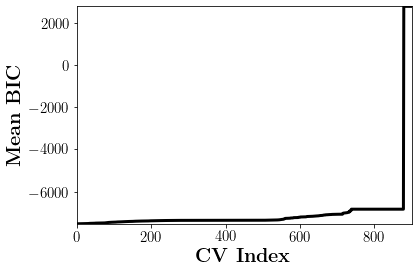

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.sort(mean_bics_em.ravel()), linewidth=3, color='black')
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean BIC}', fontsize=20)

ax.set_xlim([0, 900])
ax.set_ylim([mean_bics_em.min(), mean_bics_em.max()])
ax.tick_params(labelsize=15)
plt.show()

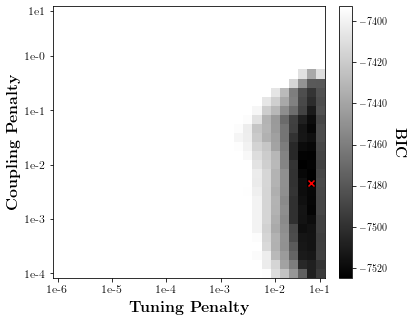

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_bics_em, vmin=np.min(mean_bics_em), vmax=np.percentile(mean_bics_em, q=20))

ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks(ticks_em)
ax.set_yticks(ticks_em)
ax.set_xticklabels(xticklabels_em, fontsize=12)
ax.set_yticklabels(yticklabels_em, fontsize=12)

ax.scatter(best_bic_em[1], best_bic_em[0], color='red', marker='x')

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{BIC}', fontsize=15, labelpad=20, rotation=270)
plt.show()

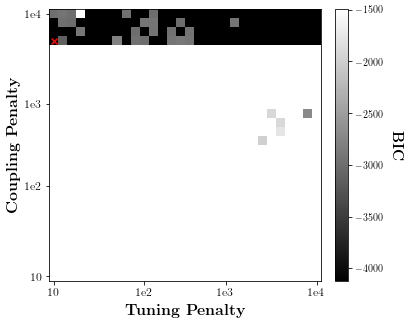

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_bics_tc, vmin=np.min(mean_bics_tc), vmax=np.percentile(mean_bics_tc, q=20))

ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks(ticks_tc)
ax.set_yticks(ticks_tc)
ax.set_xticklabels(xticklabels_tc, fontsize=12)
ax.set_yticklabels(yticklabels_tc, fontsize=12)

ax.scatter(best_bic_tc[1], best_bic_tc[0], color='red', marker='x')

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{BIC}', fontsize=15, labelpad=20, rotation=270)
plt.show()

# Selection Ratio

In [20]:
a_srs = np.median((np.count_nonzero(a_est_em, axis=2) / N).reshape((30, 30, -1)), axis=2)
b_srs = np.median((np.count_nonzero(b_est_em, axis=2) / M).reshape((30, 30, -1)), axis=2)
B_srs = np.median((np.count_nonzero(B_est, axis=(2, 3)) / (N * M)).reshape((30, 30, -1)), axis=2)

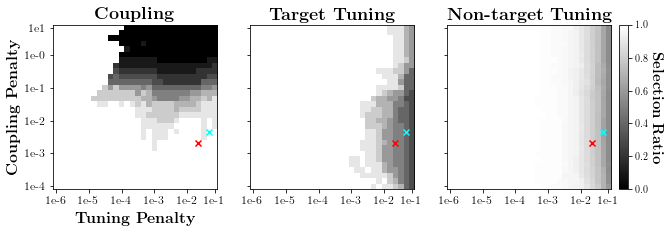

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

axes[0].imshow(a_srs, vmin=0, vmax=1)
axes[1].imshow(b_srs, vmin=0, vmax=1)
img = axes[2].imshow(B_srs, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

axes[0].set_xticks(ticks_em)
axes[1].set_yticks(ticks_em)

for ax in axes:
    ax.set_xticklabels(xticklabels_em, fontsize=12)
    ax.set_yticklabels(yticklabels_em, fontsize=12)
    ax.scatter(best_ll_em[1], best_ll_em[0], color='red', marker='x')
    ax.scatter(best_bic_em[1], best_bic_em[0], color='cyan', marker='x')

axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Ratio}', fontsize=15, labelpad=15, rotation=270)

plt.show()

In [22]:
a_srs = np.median((np.count_nonzero(a_est_tc, axis=2) / N).reshape((30, 30, -1)), axis=2)
b_srs = np.median((np.count_nonzero(b_est_tc, axis=2) / M).reshape((30, 30, -1)), axis=2)

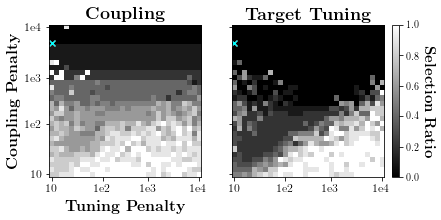

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharex=True, sharey=True)

axes[0].imshow(a_srs, vmin=0, vmax=1)
img = axes[1].imshow(b_srs, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

axes[0].set_xticks(ticks_tc)
axes[1].set_yticks(ticks_tc)

for ax in axes:
    ax.set_xticklabels(xticklabels_tc, fontsize=12)
    ax.set_yticklabels(yticklabels_tc, fontsize=12)
    ax.scatter(best_ll_tc[1], best_ll_tc[0], color='red', marker='x')
    ax.scatter(best_bic_tc[1], best_bic_tc[0], color='cyan', marker='x')

axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Ratio}', fontsize=15, labelpad=15, rotation=270)

plt.show()

# Selection Accuracy

In [25]:
b_mask = b_true != 0
a_mask = a_true != 0
B_mask = B_true != 0

In [27]:
a_est_masks_em = a_est_em != 0
b_est_masks_em = b_est_em != 0
B_est_masks = B_est != 0

In [28]:
a_norm_em = np.sum(a_est_masks_em, axis=2) + np.sum(a_mask)
b_norm_em = np.sum(b_est_masks_em, axis=2) + np.sum(b_mask)
B_norm_em = np.sum(B_est_masks, axis=(2, 3)) + np.sum(B_mask)

In [29]:
a_sa_em = np.median(1 - np.sum(a_est_masks_em != a_mask, axis=2) / a_norm_em, axis=1).reshape((30, 30))
b_sa_em = np.median(1 - np.sum(b_est_masks_em != b_mask, axis=2) / b_norm_em, axis=1).reshape((30, 30))
B_sa_em = np.median(1 - np.sum(B_est_masks != B_mask, axis=(2, 3)) / B_norm_em, axis=1).reshape((30, 30))

In [30]:
mean_sa_em = (a_sa_em + b_sa_em + B_sa_em) / 3

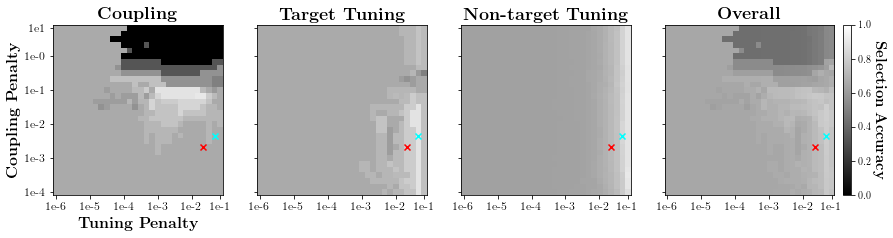

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True)

axes[0].imshow(a_sa_em, vmin=0, vmax=1)
axes[1].imshow(b_sa_em, vmin=0, vmax=1)
axes[2].imshow(B_sa_em, vmin=0, vmax=1)
img = axes[3].imshow(mean_sa_em, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)


for ax in axes:
    ax.set_xticks(ticks_em)
    ax.set_yticks(ticks_em)
    ax.set_xticklabels(xticklabels_em, fontsize=12)
    ax.set_yticklabels(yticklabels_em, fontsize=12)
    ax.scatter(best_ll_em[1], best_ll_em[0], color='red', marker='x')
    ax.scatter(best_bic_em[1], best_bic_em[0], color='cyan', marker='x')

axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)
axes[3].set_title(r'\textbf{Overall}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[3].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Accuracy}', fontsize=15, labelpad=15, rotation=270)

plt.show()

In [32]:
a_est_masks_tc = a_est_tc != 0
b_est_masks_tc = b_est_tc != 0

a_norm_tc = np.sum(a_est_masks_tc, axis=2) + np.sum(a_mask)
b_norm_tc = np.sum(b_est_masks_tc, axis=2) + np.sum(b_mask)

a_sa_tc = np.median(1 - np.sum(a_est_masks_tc != a_mask, axis=2) / a_norm_tc, axis=1).reshape((30, 30))
b_sa_tc = np.median(1 - np.sum(b_est_masks_tc != b_mask, axis=2) / b_norm_tc, axis=1).reshape((30, 30))
mean_sa_tc = (a_sa_tc + b_sa_tc) / 2

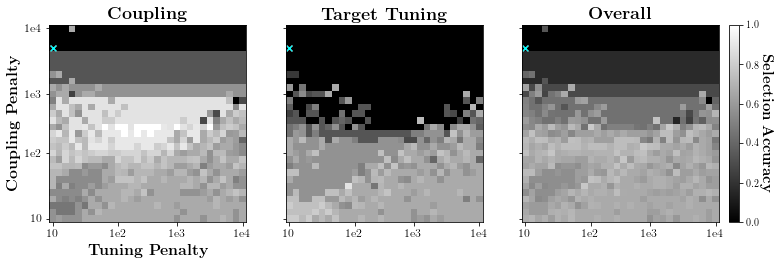

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

axes[0].imshow(a_sa_tc, vmin=0, vmax=1)
axes[1].imshow(b_sa_tc, vmin=0, vmax=1)
img = axes[2].imshow(mean_sa_tc, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)


for ax in axes:
    ax.set_xticks(ticks_tc)
    ax.set_yticks(ticks_tc)
    ax.set_xticklabels(xticklabels_tc, fontsize=12)
    ax.set_yticklabels(yticklabels_tc, fontsize=12)
    ax.scatter(best_ll_tc[1], best_ll_tc[0], color='red', marker='x')
    ax.scatter(best_bic_tc[1], best_bic_tc[0], color='cyan', marker='x')

axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Overall}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Accuracy}', fontsize=15, labelpad=15, rotation=270)

plt.show()

# Bias 

In [31]:
b_mask = b_true != 0
a_mask = a_true != 0
a_nz = a_true[a_mask]
b_nz = b_true[b_mask]

In [35]:
a_bias_em = np.mean(np.median(a_est_em - a_true, axis=1).reshape((30, 30, -1)), axis=-1)
b_bias_em = np.mean(np.median(b_est_em - b_true, axis=1).reshape((30, 30, -1)), axis=-1)
B_bias_em = np.mean(np.median(B_est - B_true, axis=1).reshape((30, 30, 10, 10)), axis=(2, 3))

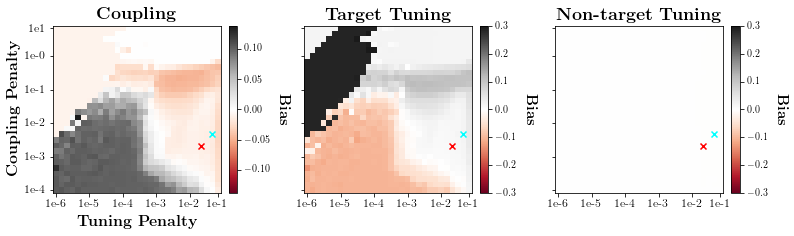

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

ext_c = np.max(np.abs(a_bias_em))
ext_t = np.max([np.abs(b_bias_em), np.abs(B_bias_em)])
img1 = axes[0].imshow(a_bias_em, vmin=-ext_c, vmax=ext_c, cmap='RdGy')
img2 = axes[1].imshow(b_bias_em, vmin=-ext_t, vmax=ext_t, cmap='RdGy')
img3 = axes[2].imshow(B_bias_em, vmin=-ext_t, vmax=ext_t, cmap='RdGy')


for ax in axes:
    ax.set_xticks(ticks_em)
    ax.set_yticks(ticks_em)
    ax.set_xticklabels(xticklabels_em, fontsize=12)
    ax.set_yticklabels(yticklabels_em, fontsize=12)
    ax.scatter(best_ll_em[1], best_ll_em[0], color='red', marker='x')
    ax.scatter(best_bic_em[1], best_bic_em[0], color='cyan', marker='x')
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)


[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img3, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

plt.show()

In [38]:
a_bias_tc = np.mean(np.median(a_est_tc - a_true, axis=1).reshape((30, 30, -1)), axis=-1)
b_bias_tc = np.mean(np.median(b_est_tc - b_true, axis=1).reshape((30, 30, -1)), axis=-1)

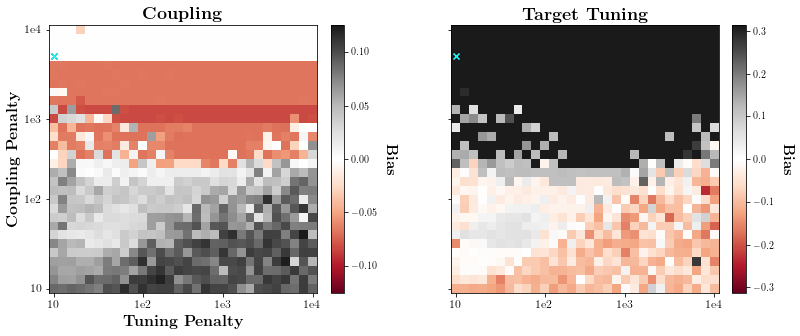

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

ext_c = np.max(np.abs(a_bias_tc))
ext_t = np.max(np.abs(b_bias_tc))
img1 = axes[0].imshow(a_bias_tc, vmin=-ext_c, vmax=ext_c, cmap='RdGy')
img2 = axes[1].imshow(b_bias_tc, vmin=-ext_t, vmax=ext_t, cmap='RdGy')

for ax in axes:
    ax.set_xticks(ticks_tc)
    ax.set_yticks(ticks_tc)
    ax.set_xticklabels(xticklabels_tc, fontsize=12)
    ax.set_yticklabels(yticklabels_tc, fontsize=12)
    ax.scatter(best_ll_tc[1], best_ll_tc[0], color='red', marker='x')
    ax.scatter(best_bic_tc[1], best_bic_tc[0], color='cyan', marker='x')
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)


plt.show()

# Bias (Ground Truth Non-Zero) 

In [37]:
a_nz_bias = np.mean(np.median((a_est[..., a_mask] - a_nz), axis=1).reshape((30, 30, -1)), axis=-1)
b_nz_bias = np.mean(np.median((b_est[..., b_mask] - b_nz), axis=1).reshape((30, 30, -1)), axis=-1)

In [38]:
plot_idxs = np.ravel_multi_index(
    ([15, 25, 13, 2], [15, 15, 23, 20]),
    dims=(30, 30)
)

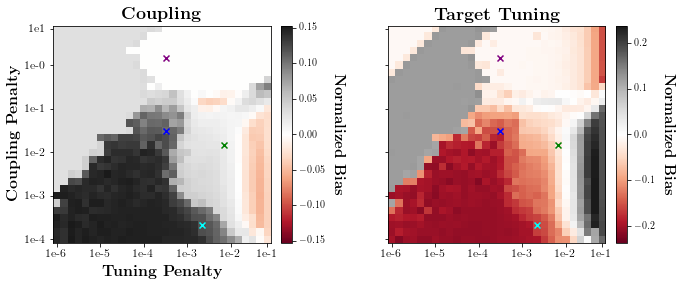

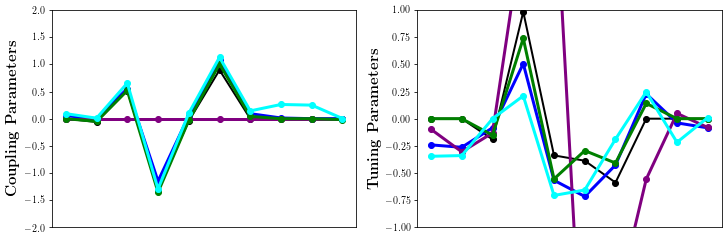

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

ext_c = np.max(np.abs(a_nz_bias))
ext_t = np.max([np.abs(b_nz_bias), np.abs(B_bias)])

img1 = axes[0].imshow(a_nz_bias, vmin=-ext_c, vmax=ext_c, cmap='RdGy')
img2 = axes[1].imshow(b_nz_bias, vmin=-ext_t, vmax=ext_t, cmap='RdGy')

axes[0].set_xticks(ticks)
axes[1].set_yticks(ticks)

for ax in axes:
    ax.set_xticklabels(xticklabels, fontsize=12)
    ax.set_yticklabels(yticklabels, fontsize=12)
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)

for ax in axes:
    ax.scatter(15, 15, color='blue', marker='x')
    ax.scatter(15, 25, color='purple', marker='x')
    ax.scatter(23, 13, color='green', marker='x')
    ax.scatter(20, 2, color='cyan', marker='x')

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Normalized Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Normalized Bias}', fontsize=15, labelpad=20, rotation=270)
plt.show()

### second plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['blue', 'purple', 'green', 'cyan']

axes[0].plot(a_true, color='k', marker='o', linewidth=2)
for idx, plot_idx in enumerate(plot_idxs):
    axes[0].plot(np.median(a_est[plot_idx], axis=0), color=colors[idx], marker='o', linewidth=3)
    
axes[1].plot(b_true, color='k', marker='o', linewidth=2)
for idx, plot_idx in enumerate(plot_idxs):
    axes[1].plot(np.median(b_est[plot_idx], axis=0), color=colors[idx], marker='o', linewidth=3)
    
for ax in axes:
    ax.tick_params(labelsize=10)
    ax.set_xticks([])
    
axes[0].set_ylim([-2, 2])
axes[1].set_ylim([-1, 1])

axes[0].set_ylabel(r'\textbf{Coupling Parameters}', fontsize=15)
axes[1].set_ylabel(r'\textbf{Tuning Parameters}', fontsize=15)
plt.show()